In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [37]:
df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [38]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [40]:
df.duplicated().sum()

0

In [41]:
df.drop(columns=["Serial No."], inplace=True)

In [42]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [45]:
df.columns = df.columns.str.strip()

In [46]:
X = df.drop(columns=["Chance of Admit"], axis=1)
y = df["Chance of Admit"]

In [47]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [48]:
X.shape, y.shape

((500, 7), (500,))

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [50]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler= MinMaxScaler()

In [53]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [55]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [56]:
model = Sequential()

In [72]:
model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='linear'))

In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 8         
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 14        
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 8         
Total params: 142
Trainable params: 142
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.compile(loss="mean_squared_error", optimizer="Adam")

In [75]:
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
10/10 [==============================] - 1s 21ms/step - loss: 0.1566 - val_loss: 0.0878
Epoch 2/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0491 - val_loss: 0.0211
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0154 - val_loss: 0.0172
Epoch 4/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0172 - val_loss: 0.0181
Epoch 5/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0152 - val_loss: 0.0140
Epoch 6/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0131 - val_loss: 0.0132
Epoch 7/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0128 - val_loss: 0.0126
Epoch 8/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0122 - val_loss: 0.0121
Epoch 9/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0117 - val_loss: 0.0116
Epoch 10/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0112 - val_loss: 0.0110
Epoch 11/50
10/10 

In [76]:
y_predict = model.predict(X_test_scaled)

In [77]:
y_predict

array([[0.64874214],
       [0.7311478 ],
       [0.89479184],
       [0.6987023 ],
       [0.7866544 ],
       [0.6473003 ],
       [0.77376443],
       [0.6459555 ],
       [0.8102586 ],
       [0.5545804 ],
       [0.66047674],
       [0.57104677],
       [0.859109  ],
       [0.80163634],
       [0.77559227],
       [0.84956396],
       [0.6282207 ],
       [0.7581461 ],
       [0.92964464],
       [0.66866875],
       [0.47633946],
       [0.7831472 ],
       [0.8045836 ],
       [0.71758616],
       [0.7729102 ],
       [0.58020914],
       [1.01492   ],
       [0.66279083],
       [0.89082384],
       [0.6815343 ],
       [0.6417582 ],
       [0.78473836],
       [0.59732664],
       [0.9048595 ],
       [0.46920165],
       [0.81462973],
       [0.65372294],
       [0.6420701 ],
       [0.66434747],
       [0.9162237 ],
       [0.5528928 ],
       [0.6205801 ],
       [0.8501753 ],
       [0.96444845],
       [0.766552  ],
       [0.48838285],
       [0.64875907],
       [0.556

In [78]:
y_test

304    0.62
340    0.75
47     0.89
67     0.57
479    0.79
       ... 
11     0.84
192    0.86
92     0.34
221    0.75
110    0.61
Name: Chance of Admit, Length: 100, dtype: float64

In [70]:
from sklearn.metrics import accuracy_score, r2_score

In [79]:
r2_score(y_test, y_predict)

0.734961896441692

In [80]:
import matplotlib.pyplot as plt

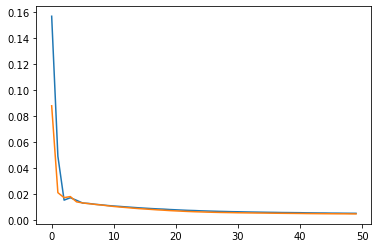

In [81]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
